# CPSC 330 Python notes

#### About this document

This document contains some Python lecture materials from the 1st offering of CPSC 330. We have decided to stop allocated lecture time to this topic and instead have this as reference material.

In [1]:
import numpy as np
import pandas as pd

## Plotting with matplotlib

- We will use [matplotlib](https://matplotlib.org/) as our plotting library.
- For those familiar with MATLAB, this package is based on MATLAB plotting.
- To use matplotlib, we first import it:

In [2]:
import matplotlib.pyplot as plt

- We can now use functions in `plt` to plot things:

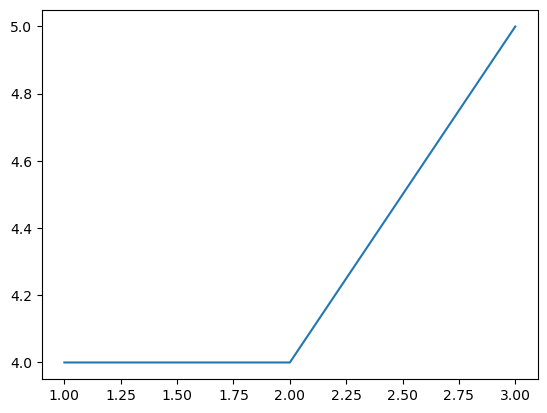

In [3]:
x = [1,2,3]
y = [4,4,5]
plt.plot(x,y)

- You will often see me put a semicolon at the end of a line. 
- This is only relevant to Jupyter; it suppresses the line of "output"..

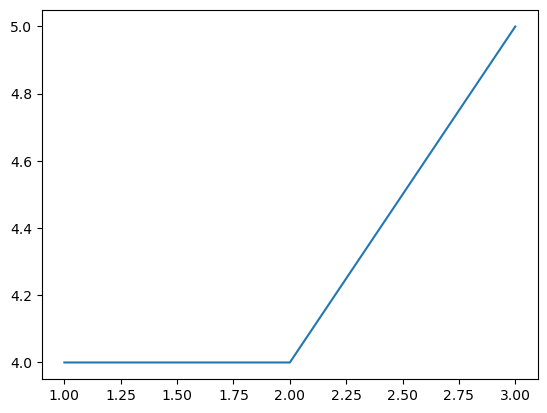

In [4]:
plt.plot(x,y);

- In your homework assignments, at a minimum, you should have axis labels for _every_ figure that you submit.

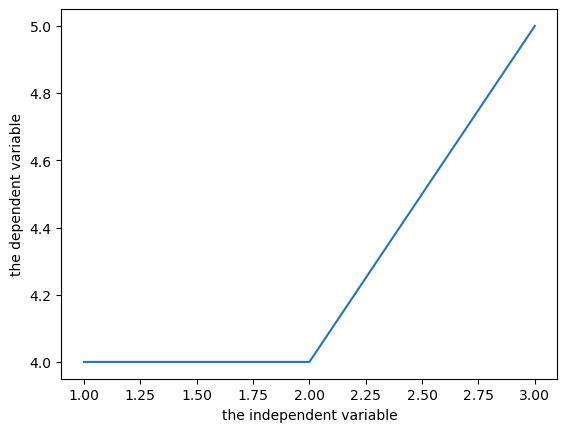

In [5]:
plt.plot(x,y)
plt.xlabel("the independent variable")
plt.ylabel("the dependent variable");

- If you are plotting multiple curves, make sure you include a legend!

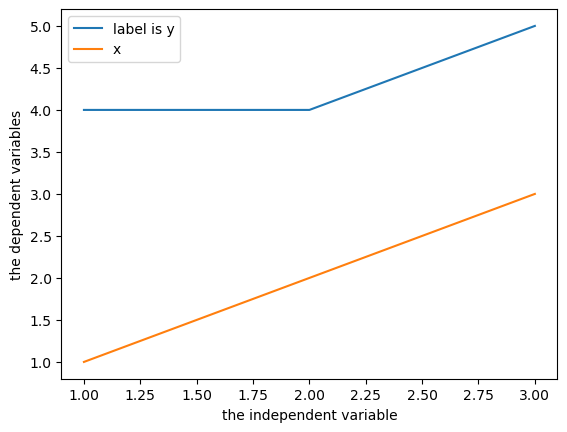

In [6]:
plt.plot(x,y, label="label is y")
plt.plot(x,x, label="x")
plt.xlabel("the independent variable")
plt.ylabel("the dependent variables")
plt.legend();

- You will likely need to visit the [matplotlib.pyplot documentation](https://matplotlib.org/api/pyplot_api.html) when trying to do other things.
- When you save an `.ipynb` file, the output, including plots, is stored in the file.
  - This is a hassle for git.
  - But it's also convenient.
  - This is how you will submit plots.

## Numpy arrays

Basic numpy is covered in the posted videos, you are expected to have a basic knowledge of numpy.

In [7]:
x = np.zeros(4)
x

array([0., 0., 0., 0.])

In [8]:
y = np.ones(4)

In [9]:
x+y

array([1., 1., 1., 1.])

In [10]:
z = np.random.rand(2,3)
z

array([[0.17393037, 0.16991815, 0.18317085],
       [0.56521734, 0.37050406, 0.33888659]])

In [11]:
z[0,1]

0.1699181533555938

## Numpy array shapes

**One of the most confusing things about numpy:** what I call a "1-D array" can have 3 possible shapes:

In [12]:
x = np.ones(5)
print(x)
print("size:", x.size)
print("ndim:", x.ndim)
print("shape:",x.shape)

[1. 1. 1. 1. 1.]
size: 5
ndim: 1
shape: (5,)


In [13]:
y = np.ones((1,5))
print(y)
print("size:", y.size)
print("ndim:", y.ndim)
print("shape:",y.shape)

[[1. 1. 1. 1. 1.]]
size: 5
ndim: 2
shape: (1, 5)


In [14]:
z = np.ones((5,1))
print(z)
print("size:", z.size)
print("ndim:", z.ndim)
print("shape:",z.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
size: 5
ndim: 2
shape: (5, 1)


In [15]:
np.array_equal(x,y)

False

In [16]:
np.array_equal(x,z)

False

In [17]:
np.array_equal(y,z)

False

## Broadcasting in numpy

- Arrays with different sizes cannot be directly used in arithmetic operations.
- Broadcasting describes how numpy treats arrays with different shapes during arithmetic operations.
- The idea is to **vectorize** operations to avoid loops and speed up the code.

- Example: I sell pies on the weekends.
- I sell 3 types of pies at different prices, and I sold the following number of each pie last weekend.
- I want to know how much money I made per pie type per day.

<img src='img/pies.png' width="500"> 

In [18]:
cost = np.array([20, 15, 25])
print("Pie cost:")
print(cost.reshape(3,1))
sales = np.array([[2, 3, 1],
                  [6, 3, 3],
                  [5, 3, 5]])
print("\nPie sales (#):")
print(sales)

Pie cost:
[[20]
 [15]
 [25]]

Pie sales (#):
[[2 3 1]
 [6 3 3]
 [5 3 5]]


- How can we multiply these two arrays together?

<img src='img/pies_loop.png' width="500"> 

#### Slowest method: nested loop


In [19]:
total = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        total[i,j] = cost[i] * sales[i,j]
total

array([[ 40.,  60.,  20.],
       [ 90.,  45.,  45.],
       [125.,  75., 125.]])

#### Faster method: vectorize the loop over rows

In [20]:
total = np.zeros((3, 3))
for j in range(3):
    total[:,j] = cost * sales[:,j]
total

array([[ 40.,  60.,  20.],
       [ 90.,  45.,  45.],
       [125.,  75., 125.]])

#### No-loop method: make them the same size, and multiply element-wise


<img src='img/pies_broadcast.png' width="700"> 


In [21]:
cost_rep = np.repeat(cost[:,np.newaxis], 3, axis=1)
cost_rep

array([[20, 20, 20],
       [15, 15, 15],
       [25, 25, 25]])

In [22]:
cost_rep * sales

array([[ 40,  60,  20],
       [ 90,  45,  45],
       [125,  75, 125]])

- What is `np.newaxis?`
- It changes the shape:

In [23]:
cost.shape

(3,)

In [24]:
cost[:,np.newaxis].shape

(3, 1)

In [25]:
cost.reshape(3,1).shape # the name thing

(3, 1)

In [26]:
cost[np.newaxis].shape

(1, 3)

#### Fastest method: broadcasting

In [27]:
cost[:,np.newaxis] * sales

array([[ 40,  60,  20],
       [ 90,  45,  45],
       [125,  75, 125]])

- numpy does the equivalent of `np.repeat()` for you - no need to do it explicitly
- It is debatable whether this code is more readable, but it is definitely faster. 

### When can we use broadcasting?

Say we want to broadcast the following two arrays:

In [28]:
arr1 = np.arange(3)
arr2 = np.ones((5))

In [29]:
arr1

array([0, 1, 2])

In [30]:
arr2

array([1., 1., 1., 1., 1.])

In [31]:
arr1.shape

(3,)

In [32]:
arr2.shape

(5,)

- The broadcast will fail because the arrays are not compatible...

In [33]:
arr1 + arr2

ValueError: operands could not be broadcast together with shapes (3,) (5,) 

- We can facilitate this broadcast by adding a dimension using `np.newaxis`.
- `np.newaxis` increases the dimension of an array by one dimension.

In [ ]:
arr1.shape

In [ ]:
arr1 = arr1[:, np.newaxis]

In [ ]:
arr1.shape

In [ ]:
arr2 = arr2[np.newaxis]

In [ ]:
arr2.shape

In [ ]:
arr1 + arr2

- the opposite, reducing a dimension, can be achieved by `np.squeeze()`

In [ ]:
arr1.shape

In [ ]:
np.squeeze(arr1).shape

The rules of broadcasting:

- NumPy compares arrays one dimension at a time. It starts with the trailing dimensions, and works its way to the first dimensions.
- dimensions are compatible if:
    - **they are equal**, or
    - **one of them is 1**.
- Use the code below to test out array compatibitlity

In [ ]:
a = np.ones((5,1))
b = np.ones((1,3))
print(f"The shape of a is: {a.shape}")
print(f"The shape of b is: {b.shape}")
try:
    print(f"The shape of a + b is: {(a + b).shape}")
except:
    print(f"ERROR: arrays are NOT broadcast compatible!")

## Introduction to pandas

- The most popular Python library for tabular data structures

In [ ]:
import pandas as pd

### Pandas Series
- A Series is like a NumPy array but with labels
- 1-dimensional
- Can be created from a list, ndarray or dictionary using `pd.Series()`
- Labels may be integers or strings

Here are two series of gold medal counts for the 2012 and 2016 Olympics:

<img src='img/series.png' width="400"> 

In [ ]:
pd.Series()

In [ ]:
s1 = pd.Series(data = [46, 38, 29, 19, 17],
               index = ['USA','CHN','GBR','RUS','GER'])
s1

In [ ]:
s2 = pd.Series([46, 26, 27],
               ['USA', 'CHN', 'GBR'])
s2

- Like ndarrays we use square brackets `[]` to index a series
- BUT, Series can be indexed by an integer location **OR** a label

In [ ]:
s1

In [ ]:
s1.iloc[0]

In [ ]:
s1.iloc[1]

In [ ]:
s1["USA"]

In [ ]:
s1["USA":"RUS"]

Do we expect these two series to be compatible for broadcasting?

In [ ]:
s1

In [ ]:
s2

In [ ]:
print(f"The shape of s1 is: {s1.shape}")
print(f"The shape of s2 is: {s2.shape}")

In [ ]:
s1 + s2

- Unlike ndarrays operations between Series (+, -, /, \*) align values based on their **LABELS**
- The result index will be the __*sorted union*__ of the two indexes

## Pandas DataFrames

- The primary Pandas data structure
- Really just a bunch of Series (with the same index labels) stuck together
- Made using `pd.DataFrame()`

<img src='img/dataframe.png' width="600"> 

Creating a DataFrame with a numpy array

In [ ]:
d = np.array([[46, 46],
              [38, 26],
              [29, 27]])
c = ['2012', '2016']
i = ['USA', 'CHN', 'GBR']
df = pd.DataFrame(data=d, index=i, columns=c)
df

(optional) Creating a DataFrame with a dictionary

In [ ]:
d = {'2012': [46, 38, 29],
     '2016': [46, 26, 27]}
i = ['USA', 'CHN', 'GBR']
df = pd.DataFrame(d, i)
df

### Indexing Dataframes
- There are three main ways to index a DataFrame:
    1. `[]` (slice for rows, label for columns)
    2. `.loc[]`
    3. `.iloc[]`

In [ ]:
df

##### `[]` notation
- you can index columns by single labels or lists of labels

In [ ]:
df['2012']

In [ ]:
type(df['2012'])

In [ ]:
type(['2012', '2016'])

In [ ]:
df[['2012', '2016']]

(optional) you can also index rows with `[]`, but you can only index rows with slices

In [ ]:
df["CHN":"GBR"]

In [ ]:
# df["USA"] # doesn't work

In [ ]:
df[:"USA"] # does work

- this is a little unintuitive, so pandas created two other ways to index a dataframe:
- for indexing with integers: `df.iloc[]`
- for indexing with labels: `df.loc[]`

In [ ]:
df

In [ ]:
df.iloc[1]

In [ ]:
df.iloc[2,1]

In [ ]:
df.loc['CHN']

In [ ]:
df.loc['GBR', '2016']

In [ ]:
df.loc[['USA', 'GBR'], ['2012']]

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
#df.loc[df.index[0], '2016']

In [ ]:
#df.loc['USA', df.columns[0]]

#### Indexing cheatsheet
- `[]` accepts slices for row indexing or labels (single or list) for column indexing
- `.iloc[]` accepts integers for row/column indexing, and can be single values or lists
- `.loc[]` accepts labels for row/column indexing, and can be single values or lists
- for integer row/named column: `df.loc[df.index[#], 'labels']`
- for named row/integer column: `df.loc['labels', df.columns[#]]`

## Break (5 min)

### Reading from .csv
- Most of the time you will be loading .csv files for use in pandas using `pd.read_csv()`
- Example dataset: a colleague's cycling commute to/from UBC everyday

In [ ]:
path = 'data/cycling_data.csv'

In [ ]:
pd.read_csv(path, index_col=0, parse_dates=True).head()

### Reading from url
- you may also want to read directly from an url at times
- `pd.read_csv()` accepts urls as input

In [ ]:
url = 'https://raw.githubusercontent.com/TomasBeuzen/toy-datasets/master/wine_1.csv'
pd.read_csv(url)

### Reading from other formats

- `pd.read_excel()`
- `pd.read_html()`
- `pd.read_json()`
- etc

### Dataframe summaries

In [ ]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe(include='all')

### Renaming columns with `df.rename()`

In [ ]:
df.head()

- we can rename specific columns using `df.rename()`

In [ ]:
{"Comments": "Notes"}

In [ ]:
type({"Comments": "Notes"})

In [ ]:
df = df.rename(columns={"Comments": "Notes"})
df.head()

- there are two options for making permanent dataframe changes:
    - 1. set the argument `inplace=True`, e.g., `df.rename(..., inplace=True)`
    - 2. re-assign, e.g., `df = df.rename(...)`

In [ ]:
df.rename(columns={"Comments": "Notes"}, inplace=True) # inplace
df = df.rename(columns={"Comments": "Notes"}) # re-assign

#### NOTE:
- the pandas team discourages the use of `inplace` for a [few reasons](https://www.youtube.com/watch?v=hK6o_TDXXN8&t=700)
- mostly because not all functions have the argument, hides memory copying, leads to hard-to-find bugs
- it is recommend to **re-assign** (method 2 above)

- we can also change all columns at once using a list

In [ ]:
df.columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6']
df.head()

### Adding/removing columns with `[]` and `drop()`

In [ ]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

- adding a single column

In [ ]:
df['Speed'] = 3.14159265358979323
df.head()

- dropping a column

In [ ]:
df = df.drop(columns="Speed")
df.head()

- we can also add/drop multiple columns at a time

In [ ]:
df = df.drop(columns=['Type', 'Time'])
df.head()

### Adding/removing rows with `[]` and `drop()`

In [ ]:
df = pd.read_csv('data/cycling_data.csv')
df.tail()

In [ ]:
last_row = df.iloc[-1]
last_row

In [ ]:
df.shape

(optional) We can add the row to the end of the dataframe using `df.append()`

In [ ]:
df = df.append(last_row)
df.tail()

In [ ]:
df.shape

- but now we have the index label `32` occurring twice (that can be bad! Why?)

In [ ]:
df.loc[32]

In [ ]:
df = df.iloc[0:33]
df.tail()

- we need can set `ignore_index=True` to avoid duplicate index labels

In [ ]:
df = df.append(last_row, ignore_index=True)
df.tail()

In [ ]:
df = df.drop(index=[33])
df.tail()

### Sorting a dataframe with `df.sort_values()`

In [ ]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

In [ ]:
df.sort_values(by='Time').head()

In [ ]:
df.head()

- use the `ascending` argument to specify sort order as ascending or descending

In [ ]:
df.sort_values(by="Time", ascending=False).head()

(optional) we can sort by multiple columns in succession by passing in lists

In [ ]:
df.sort_values(by=['Name', 'Time'], ascending=[True, False]).head()

- we can sort a dataframe back to it's orginal state (based on index) using `df.sort_index()`

In [ ]:
df.sort_index().head()

### Filtering a dataframe with `[]` and `df.query()`

- we've already seen how to filter a dataframe using `[]`, `.loc` and `.iloc` notation
- but what if we want more control?
- `df.query()` is a powerful tool for filtering data

In [ ]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

- `df.query()` accepts a string expression to evaluate, using it's own syntax

In [ ]:
df.query('Time > 2500 and Distance < 13')

In [ ]:
df[(df['Time'] > 2500) & (df['Distance'] < 13)]

- we can refer to variables in the environment by prefixing them with an `@` 

In [ ]:
thresh = 2800
df.query('Time > @thresh')

### Applying functions to a dataframe with `df.apply()` and `df.applymap()`

- many common functions are built into Pandas as dataframe methods
- e.g., `df.mean()`, `df.round()`, `df.min()`, `df.max()`, `df.sum()`, etc.

In [ ]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

In [ ]:
df.mean()

In [ ]:
df.min()

In [ ]:
df.max()

In [ ]:
df.sum()

- however there will be times when you want to apply a non-built in function
- `df.apply()` applies a function column-wise or row-wise
- the function must be able to operate over an entire row or column at a time

In [ ]:
df[['Time', 'Distance']].head()

In [ ]:
np.sin(2)

In [ ]:
np.sin(0)

- you may use functions from other packages, such as numpy

In [ ]:
df[['Time', 'Distance']].apply(np.sin).head()

- or make your own custom function

In [ ]:
df[['Time']].apply(lambda x: x/60).head()

- use `df.applymap()` for functions that accept and return a scalar

In [ ]:
df.info()

In [ ]:
float(3)

In [ ]:
float([1, 2]) # this function only accepts a single value, so this will fail

In [ ]:
df[['Time']].apply(float).head() # fails

In [ ]:
df_float_1 = df[['Time']].applymap(float).head() # works with applymap
df_float_1

- however, if you're applying an in-built function, there's often another (vectorized) way...
- from [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) "*Note that a vectorized version of func often exists, which will be much faster.*"

In [ ]:
df_float_2 = df[['Time']].astype(float).head() # alternatively, use astype
df_float_2

In [ ]:
# using vectorized .astype
%timeit df[['Time']].astype(float)

In [ ]:
# using element-wise .applymap
%timeit df[['Time']].applymap(float)